In [31]:
#import and install dependencies
import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify
import squarify
import seaborn as sb
#import CSV
df = pd.read_csv("pet_supplies_2212.csv")

Defaulting to user installation because normal site-packages is not writeable


In [32]:
df.info() #inspecting data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [33]:
import numpy as np
df['price'].unique() #= pd.to_numeric(df["price"])
df['price'] = df['price'].astype(str).str.replace('unlisted', np.empty)
df['price'] = df['price'].astype(float)
df['price'].fillna(df['price'].median(), inplace=True)
df['price'] = round(df['price'], 2)
df['category'] = df['category'].replace('-', 'Unknown')
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [34]:
df.isna().sum() #inspecting null values

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [35]:
#inspecting duplicates
duplicates = df.duplicated()
duplicates.sum()

0

In [36]:
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [37]:
df['animal'].unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [38]:
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [39]:
df['size'].replace(['MEDIUM', 'medium'], ['Medium', 'Medium'], inplace=True )
df['size'].replace(['small', 'SMALL'], ['Small', 'Small'], inplace=True )
df['size'].replace(['LARGE', 'large'], ['Large', 'Large'], inplace=True )

df['rating']= pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)


In [40]:

            
df['repeat_purchase'].unique()
df.isnull().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [41]:
df['unit_sold'] = round(df['sales']/df['price'], 2)
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase,unit_sold
0,1,Food,Bird,Large,51.10,1860.62,7,1,36.41
1,2,Housing,Bird,Medium,35.98,963.60,6,0,26.78
2,3,Food,Dog,Medium,31.23,898.30,5,1,28.76
3,4,Medicine,Cat,Small,24.95,982.15,6,1,39.36
4,5,Housing,Cat,Small,26.18,832.63,7,1,31.80
...,...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,Medium,40.91,1203.36,5,0,29.41
1496,1497,Equipment,Dog,Small,32.89,1099.97,5,0,33.44
1497,1498,Food,Fish,Small,25.79,724.02,3,0,28.07
1498,1499,Medicine,Fish,Small,19.94,658.66,5,1,33.03


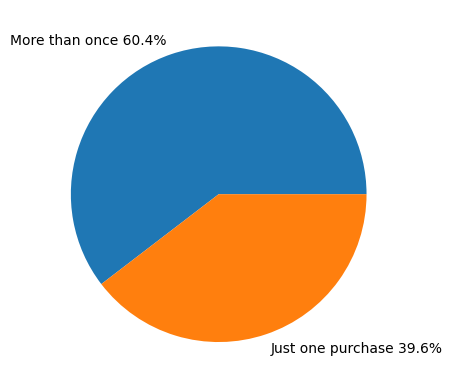

In [42]:
recorrente = df[(df['repeat_purchase'] == 1)]
norecorrente = df[(df['repeat_purchase'] == 0)]
y = [recorrente['product_id'].count(), norecorrente['product_id'].count()]
mylabels = [f"More than once {round(recorrente['product_id'].count() * 100/ df['product_id'].count(), 2)}%" , f"Just one purchase {round(norecorrente['product_id'].count()*100/ df['product_id'].count(), 2)}%"]
plt.pie(y, labels = mylabels, shadow = False)
plt.show() 

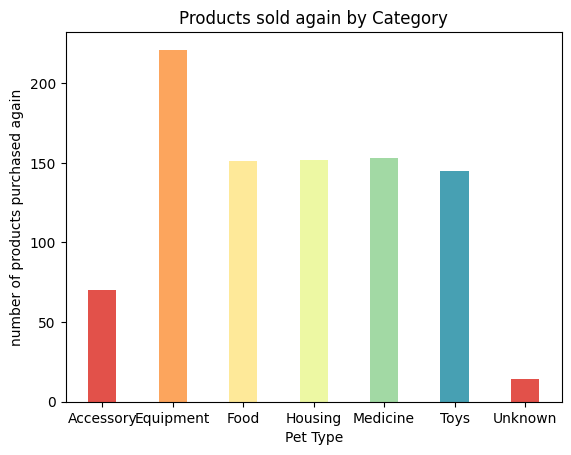

In [43]:
data = df[(df['repeat_purchase'] == 1)].groupby(['category'])['product_id'].count()
X = data.reset_index().values[:,0].tolist()
Y = data.reset_index().values[:,1].tolist()
plt.bar(X, Y, 0.4, color=sb.color_palette("Spectral") )
plt.xlabel('Pet Type')
plt.ylabel('number of products purchased again')
plt.title("Products sold again by Category")
plt.show()

In [44]:
data


category
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
Unknown       14
Name: product_id, dtype: int64

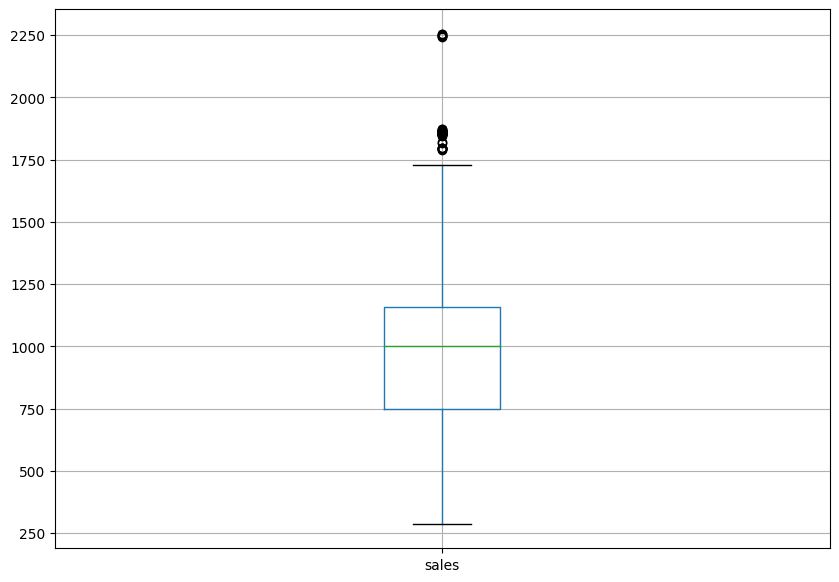

In [45]:
plt.figure(figsize =(10, 7))

df.boxplot(column=['sales'])  
plt.show()

In [46]:
df['sales'].median()
df.describe()

,product_id,price,sales,rating,repeat_purchase,unit_sold
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,29.287873,996.597847,4.492000,0.604000,33.665473
std,433.157015,7.335833,323.952676,2.105443,0.489228,5.658026
min,1.000000,12.850000,286.940000,0.000000,0.000000,12.960000
25%,375.750000,25.000000,747.420000,3.000000,0.000000,30.382500
50%,750.500000,28.060000,1000.830000,5.000000,1.000000,33.590000
75%,1125.250000,33.142500,1158.157500,6.000000,1.000000,36.890000
max,1500.000000,54.160000,2255.960000,9.000000,1.000000,66.430000


<Figure size 1000x700 with 0 Axes>

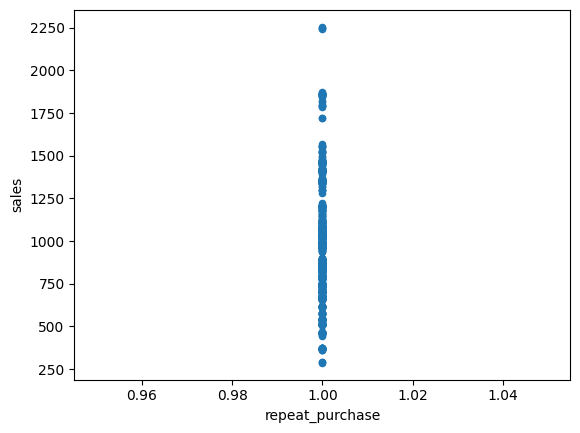

In [47]:
plt.figure(figsize =(10, 7)) 
recorrente.plot.scatter(x = 'repeat_purchase',
                   y = 'sales', colormap='viridis')
plt.show()

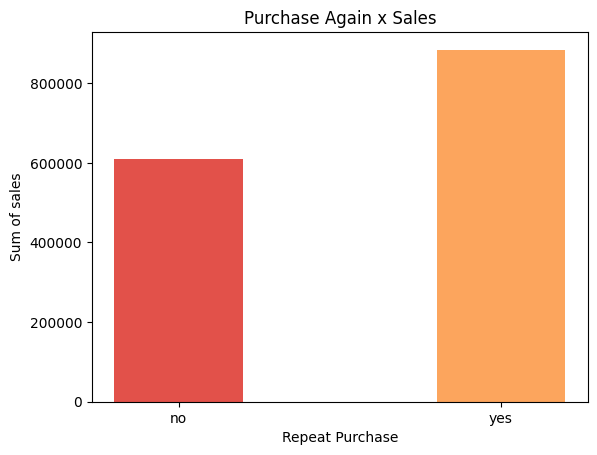

In [48]:
df['repeat_purchase'] = df['repeat_purchase'].replace([0, 1], ['no', 'yes'])
data = df.groupby(['repeat_purchase'])['sales'].sum()
X = data.reset_index().values[:,0].tolist()
Y = data.reset_index().values[:,1].tolist()
plt.bar(X, Y, 0.4, color=sb.color_palette("Spectral") )
plt.xlabel('Repeat Purchase')
plt.ylabel('Sum of sales')
plt.title("Purchase Again x Sales")
plt.show()

In [49]:
df.groupby(['repeat_purchase'])['sales'].sum()

repeat_purchase
no     610850.60
yes    884046.17
Name: sales, dtype: float64

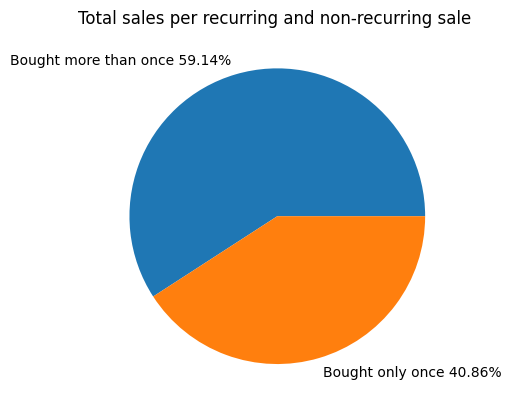

In [50]:
recorrente = df[(df['repeat_purchase'] == 'yes')]
norecorrente = df[(df['repeat_purchase'] == 'no')]
y = [recorrente['sales'].sum(), norecorrente['sales'].sum()]
mylabels = [f"Bought more than once {round(recorrente['sales'].sum() * 100/ df['sales'].sum(), 2)}%" , f"Bought only once {round(norecorrente['sales'].sum()*100/ df['sales'].sum(), 2)}%"]
plt.pie(y, labels = mylabels, shadow = False)
plt.title('Total sales per recurring and non-recurring sale ')
plt.show() 

In [51]:
df.groupby(['repeat_purchase'])['unit_sold'].sum()

repeat_purchase
no     20117.17
yes    30381.04
Name: unit_sold, dtype: float64

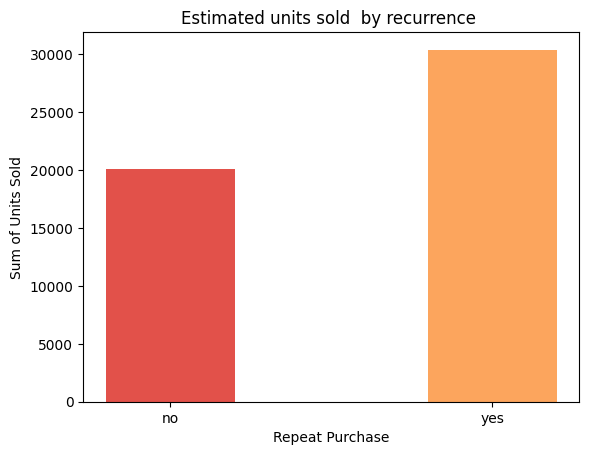

In [52]:

data = df.groupby(['repeat_purchase'])['unit_sold'].sum()
X = data.reset_index().values[:,0].tolist()
Y = data.reset_index().values[:,1].tolist()
plt.bar(X, Y, 0.4, color=sb.color_palette("Spectral") )
plt.xlabel('Repeat Purchase')
plt.ylabel('Sum of Units Sold')
plt.title("Estimated units sold  by recurrence ")
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   object 
 8   unit_sold        1500 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 105.6+ KB
